DESCRIPTION

Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

Analysis Tasks to be performed:

Import the three datasets
Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
User Age Distribution
User rating of the movie “Toy Story”
Top 25 movies by viewership rating
Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Feature Engineering:
            Use column genres:

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings
Dataset Description :

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

Ratings.dat
    Format - UserID::MovieID::Rating::Timestamp

Field	Description
UserID	Unique identification for each user
MovieID	Unique identification for each movie
Rating	User rating for each movie
Timestamp	Timestamp generated while adding user review
UserIDs range between 1 and 6040 
The MovieIDs range between 1 and 3952
Ratings are made on a 5-star scale (whole-star ratings only)
A timestamp is represented in seconds since the epoch is returned by time(2)
Each user has at least 20 ratings
 

Users.dat
Format -  UserID::Gender::Age::Occupation::Zip-code

Field	Description
UserID	Unique identification for each user
Genere	Category of each movie
Age	User’s age
Occupation	User’s Occupation
Zip-code	Zip Code for the user’s location
All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.

Gender is denoted by an "M" for male and "F" for female
Age is chosen from the following ranges:
 

Value	Description
1	"Under 18"
18	"18-24"
25	"25-34"
35	"35-44"
45	"45-49"
50	"50-55"
56	"56+"
 

Occupation is chosen from the following choices:
Value
 	Description
0	"other" or not specified
1	"academic/educator"
2	"artist”
3	"clerical/admin"
4	"college/grad student"
5	"customer service"
6	"doctor/health care"
7	"executive/managerial"
8	"farmer"
9	"homemaker"
10	"K-12 student"
11	"lawyer"
12	"programmer"
13	"retired"
14	 "sales/marketing"
15	"scientist"
16	 "self-employed"
17	"technician/engineer"
18	"tradesman/craftsman"
19	"unemployed"
20	"writer”

Movies.dat
Format - MovieID::Title::Genres

Field	Description
MovieID	Unique identification for each movie
Title	A title for each movie
Genres	Category of each movie
 

 Titles are identical to titles provided by the IMDB (including year of release)
 

Genres are pipe-separated and are selected from the following genres:
Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
Movies are mostly entered by hand, so errors and inconsistencies may exist

In [2]:
import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv(r"C:\Users\adity\Documents\Movie_Lens\movies.dat",sep='::',header=None)
movies.columns = ['MovieID','Title','Genres']
movies

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
ratings = pd.read_csv(r"C:\Users\adity\Documents\Movie_Lens\ratings.dat",sep='::',header=None)
ratings.columns = ['UserID','MovieID','Rating','Timestamp']
ratings

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
users = pd.read_csv(r"C:\Users\adity\Documents\Movie_Lens\users.dat",sep='::',header=None)
users.columns = ['UserID','Gender','Age','Occupation','Zip-Code']
users

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [6]:
master=pd.merge(users,ratings,how='inner',on='UserID')
master.drop(['Timestamp','Zip-Code'],axis=1,inplace=True)
master = pd.merge(master,movies,how='inner',on='MovieID')
master

,UserID,Gender,Age,Occupation,MovieID,Rating,Title,Genres
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,5,Modulations (1998),Documentary
1000205,5675,M,35,14,2703,3,Broken Vessels (1998),Drama
1000206,5780,M,18,17,2845,1,White Boys (1999),Drama
1000207,5851,F,18,20,3607,5,One Little Indian (1973),Comedy|Drama|Western


In [7]:
master.dtypes

UserID         int64
Gender        object
Age            int64
Occupation     int64
MovieID        int64
Rating         int64
Title         object
Genres        object
dtype: object

In [8]:
master['Age'].unique()

array([ 1, 56, 25, 50, 18, 45, 35], dtype=int64)

In [9]:
master['Age'] = master['Age'].astype('category')
master['Gender'] = master['Gender'].astype('category')
master['Occupation'] = master['Occupation'].astype('category')

In [10]:
master.dtypes

UserID           int64
Gender        category
Age           category
Occupation    category
MovieID          int64
Rating           int64
Title           object
Genres          object
dtype: object

In [11]:
print(master["Occupation"].unique())

[10, 16, 12, 7, 1, ..., 20, 13, 5, 14, 6]
Length: 21
Categories (21, int64): [10, 16, 12, 7, ..., 13, 5, 14, 6]


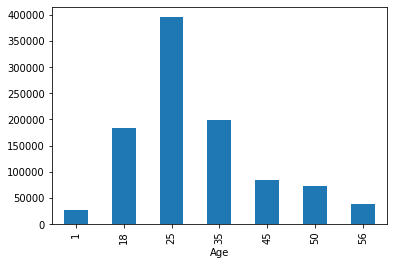

In [12]:
master.groupby('Age')['UserID'].agg('count').plot(kind='bar')

From the above plot, we come to know that most of the users are of the Age group (18-44) of which most are from 25-34 followed by (35-44) and (18-24)

In [13]:
master[master['Title'] == "Toy Story 2 (1999)"]['Rating']

55246    4
55247    3
55248    4
55249    4
55250    5
        ..
56826    5
56827    4
56828    4
56829    4
56830    4
Name: Rating, Length: 1585, dtype: int64

In [14]:
#avg rating for Toy Story 2
master[master['Title'] == "Toy Story 2 (1999)"]['Rating'].agg('mean')

4.218927444794953

In [15]:
#Top 25 movies based on avg rating
pd.DataFrame(master.groupby('Title')['Rating'].agg('mean')).sort_values(by='Rating',ascending=False).head(25)

,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [16]:
#All the movies rated by userid = 2696
master[master['UserID']==2696].loc[:,['MovieID','Title','Rating']].reset_index().drop('index',axis=1)

,MovieID,Title,Rating
0,1270,Back to the Future (1985),2
1,1097,E.T. the Extra-Terrestrial (1982),3
2,1617,L.A. Confidential (1997),4
3,800,Lone Star (1996),5
4,3386,JFK (1991),1
5,3176,"Talented Mr. Ripley, The (1999)",4
6,1711,Midnight in the Garden of Good and Evil (1997),4
7,1589,Cop Land (1997),3
8,1783,Palmetto (1998),4
9,1892,"Perfect Murder, A (1998)",4


In [17]:
#Unique genres
genres = master['Genres'].unique()
unique_genres = []
for genre in genres:
    genre_list = genre.split('|')
    for genre_str in genre_list:
        if genre_str not in unique_genres:
            unique_genres.append(genre_str)
            
print(unique_genres)

['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller', 'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir', 'Documentary']


In [18]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
def is_genre_present(genre_col,new_genre):
    if new_genre in genre_col:
        return 1
    else:
        return 0

for genre in unique_genres:
    master[genre] = master['Genres'].apply(is_genre_present, args=(genre, ))


In [19]:
master.drop(['Genres'],axis=1,inplace=True)
master.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Rating', 'Title',
       'Drama', 'Animation', 'Children's', 'Musical', 'Romance', 'Comedy',
       'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller', 'Crime',
       'Mystery', 'Western', 'Horror', 'Film-Noir', 'Documentary'],
      dtype='object')

In [20]:
master = pd.get_dummies(master, columns=['Gender'])

In [21]:
master.drop(['Gender_M'],axis=1,inplace=True)

In [22]:
master.head(5)

,UserID,Age,Occupation,MovieID,Rating,Title,Drama,Animation,Children's,Musical,...,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Gender_F
0,1,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
master1 = master

In [24]:
#Drop MovieID, UserID and Title, since they don't effect the Ratings
master1.drop(['UserID','MovieID','Title'],axis=1,inplace=True)

In [25]:
master1.head()

,Age,Occupation,Rating,Drama,Animation,Children's,Musical,Romance,Comedy,Action,...,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Gender_F
0,1,10,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,56,16,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,12,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,7,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,1,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df1 = master1.pop('Rating')
master1['Rating'] = df1

In [27]:
master1.head(5)

,Age,Occupation,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,...,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Gender_F,Rating
0,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
1,56,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,25,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,25,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,50,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [28]:
master1.columns

Index(['Age', 'Occupation', 'Drama', 'Animation', 'Children's', 'Musical',
       'Romance', 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War',
       'Thriller', 'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir',
       'Documentary', 'Gender_F', 'Rating'],
      dtype='object')

KNN only with genres

In [60]:
X = master1.iloc[:, 3:21].values
y = master1.iloc[:, 21].values

In [30]:
X

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [31]:
y

array([5, 5, 4, ..., 1, 5, 4], dtype=int64)

In [35]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [36]:
#scale train and test features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
#fit knn on training data
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
#predict classifier for test data
y_pred = classifier.predict(X_test)

In [96]:
#print test and pred values
print(y_test)
print(y_pred)

[4 5 4 ... 5 3 3]
[4 3 3 ... 4 3 4]


In [97]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred, labels=[1,2,3,4,5])

array([[  642,   682,  5784,  3428,   700],
       [  889,  1087, 10764,  7551,  1277],
       [ 1660,  1985, 25479, 20028,  3184],
       [ 1796,  2057, 32473, 28409,  4946],
       [ 1333,  1095, 19784, 18246,  4763]], dtype=int64)

In [98]:
print(metrics.classification_report(y_test, y_pred, labels=[1,2,3,4,5]))

              precision    recall  f1-score   support

           1       0.10      0.06      0.07     11236
           2       0.16      0.05      0.08     21568
           3       0.27      0.49      0.35     52336
           4       0.37      0.41      0.39     69681
           5       0.32      0.11      0.16     45221

    accuracy                           0.30    200042
   macro avg       0.24      0.22      0.21    200042
weighted avg       0.29      0.30      0.27    200042



In [110]:
# Precision = TP/(TP+FP) means how many correct positives predicted from all predicted positives
# Recall = TP/(TP+FN) means how many correct positives predicted out of total actual positives

KNN using all variables

In [52]:
X = master1.iloc[:, :21].values
y = master1.iloc[:, 21].values

In [53]:
X

array([[1, 10, 1, ..., 0, 0, 1],
       [56, 16, 1, ..., 0, 0, 0],
       [25, 12, 1, ..., 0, 0, 0],
       ...,
       [18, 17, 1, ..., 0, 0, 0],
       [18, 20, 1, ..., 0, 0, 1],
       [25, 1, 0, ..., 0, 1, 0]], dtype=object)

In [54]:
y

array([5, 5, 4, ..., 1, 5, 4], dtype=int64)

In [55]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [105]:
#scale train and test features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
#fit knn on training data
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
#predict classifier for test data
y_pred = classifier.predict(X_test)

In [108]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred, labels=[1,2,3,4,5])

array([[ 1557,  1503,  3541,  3310,  1173],
       [ 1911,  2630,  7653,  7066,  2331],
       [ 3399,  5248, 18708, 18613,  6425],
       [ 3569,  5556, 23129, 27100, 10397],
       [ 1987,  2982, 13388, 17724,  9142]], dtype=int64)

In [109]:
print(metrics.classification_report(y_test, y_pred, labels=[1,2,3,4,5]))

              precision    recall  f1-score   support

           1       0.13      0.14      0.13     11084
           2       0.15      0.12      0.13     21591
           3       0.28      0.36      0.31     52393
           4       0.37      0.39      0.38     69751
           5       0.31      0.20      0.24     45223

    accuracy                           0.30    200042
   macro avg       0.25      0.24      0.24    200042
weighted avg       0.29      0.30      0.29    200042



Random Forest Algorithm

In [56]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Train:",metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))

Accuracy Train: 0.41170780599549844
Accuracy Test: 0.35302086561822016


In [57]:
print(metrics.classification_report(y_test, y_pred, labels=[1,2,3,4,5]))

              precision    recall  f1-score   support

           1       0.26      0.06      0.10     11053
           2       0.21      0.04      0.07     21503
           3       0.31      0.22      0.26     52538
           4       0.37      0.69      0.48     69529
           5       0.37      0.22      0.27     45419

    accuracy                           0.35    200042
   macro avg       0.30      0.24      0.23    200042
weighted avg       0.33      0.35      0.31    200042



Decission Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [59]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy Train:",metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))

Accuracy Train: 0.4117615447775277
Accuracy Test: 0.351201247737975


In [60]:
print(metrics.classification_report(y_test, y_pred, labels=[1,2,3,4,5]))

              precision    recall  f1-score   support

           1       0.23      0.07      0.11     11053
           2       0.20      0.05      0.08     21503
           3       0.31      0.23      0.26     52538
           4       0.37      0.68      0.48     69529
           5       0.38      0.20      0.26     45419

    accuracy                           0.35    200042
   macro avg       0.30      0.25      0.24    200042
weighted avg       0.33      0.35      0.31    200042



Perform PCA

In [61]:
master1.head(2)

,Age,Occupation,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,...,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Gender_F,Rating
0,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
1,56,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [62]:
X = master1.drop("Rating",axis=1)
y = master1[['Rating']]

In [63]:
X.head(2)

,Age,Occupation,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,...,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Gender_F
0,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,56,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y.head(2)

,Rating
0,5
1,5


In [65]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [66]:
print(X_train.shape)

(800167, 21)


In [67]:
from sklearn.decomposition import PCA

In [68]:
sklearn_pca = PCA(n_components=0.95)

In [69]:
sklearn_pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
X_train_transformed = sklearn_pca.transform(X_train)

In [71]:
print(X_train_transformed.shape)

(800167, 2)


In [72]:
print(X_test.shape)

(200042, 21)


In [73]:
X_test_transformed = sklearn_pca.transform(X_test)

In [74]:
print(X_test_transformed.shape)

(200042, 2)


In [50]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Train:",metrics.accuracy_score(y_train, clf.predict(X_train_transformed)))
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy Train: 0.4117090557346154
Accuracy Test: 0.3537107207486428


In [51]:
print(metrics.classification_report(y_test, y_pred, labels=[1,2,3,4,5]))

              precision    recall  f1-score   support

           1       0.26      0.06      0.09     11179
           2       0.21      0.04      0.06     21869
           3       0.31      0.21      0.25     52056
           4       0.37      0.69      0.48     69833
           5       0.37      0.22      0.28     45105

    accuracy                           0.35    200042
   macro avg       0.30      0.24      0.23    200042
weighted avg       0.33      0.35      0.31    200042



In [75]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_transformed,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_transformed)

# Model Accuracy, how often is the classifier correct?
print("Accuracy Train:",metrics.accuracy_score(y_train, clf.predict(X_train_transformed)))
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))

Accuracy Train: 0.4115465896494107
Accuracy Test: 0.35126123514062046


In [76]:
print(metrics.classification_report(y_test, y_pred, labels=[1,2,3,4,5]))

              precision    recall  f1-score   support

           1       0.23      0.07      0.11     11237
           2       0.18      0.04      0.07     21439
           3       0.31      0.23      0.26     52325
           4       0.37      0.68      0.48     69946
           5       0.37      0.20      0.26     45095

    accuracy                           0.35    200042
   macro avg       0.29      0.24      0.24    200042
weighted avg       0.33      0.35      0.31    200042



Conclusion: We have built a model to predict the ratings using two Algorithms, i.e Random Forest and Decision Trees. We saw that the accuracy was very less in both cases, next we did PCA , to reduce the number of factors, and after performing PCA also we see very very less improvement in the accuracy, also precision / recall also remains same in all cases. Hence we can choose any one of these models